In [106]:
import pandas as pd
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [108]:
df=df.drop(df.index[2000:],axis=0)


In [109]:
df['Rating'].value_counts()

5    803
4    593
3    243
2    188
1    173
Name: Rating, dtype: int64

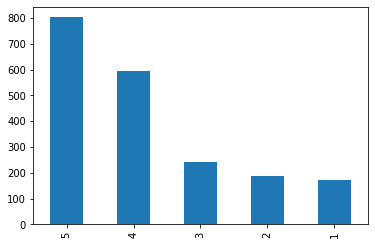

In [110]:
df['Rating'].value_counts().plot(kind = 'bar')

In [111]:
x = df.iloc[:,0].values 
y = df.iloc[:,1].values

In [112]:
x

array(['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ',
       'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroo

In [113]:
y

array([4, 2, 3, ..., 4, 4, 5])

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0) 

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [116]:
from sklearn.svm import SVC
model = SVC()

In [117]:
model.fit(x_train_v,y_train)


SVC()

In [118]:
y_pred = model.predict(x_test_v)
y_pred 

array([4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 2, 5, 5, 4, 5, 5, 5, 4, 5,
       5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 1, 4, 5, 4, 1, 5, 5, 4, 5,
       5, 5, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       4, 4, 4, 4, 5, 4, 2, 5, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 5, 4,
       5, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4,
       5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 2, 5, 4, 4, 2, 5, 5, 5,
       1, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 2, 5, 5, 4, 4, 4,
       4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 1, 5, 2, 4, 5, 2,
       5, 5, 5, 5, 1, 5, 1, 4, 4, 4, 5, 5, 4, 5, 5,

In [119]:
y_test 

array([3, 5, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 3, 2, 5, 5, 4, 2, 4, 5, 4, 5,
       5, 5, 5, 4, 1, 5, 5, 4, 3, 5, 5, 4, 5, 3, 4, 1, 4, 3, 3, 5, 5, 5,
       5, 4, 5, 4, 5, 5, 5, 5, 1, 4, 5, 1, 2, 2, 2, 4, 5, 2, 4, 5, 3, 5,
       5, 5, 3, 5, 4, 3, 5, 4, 1, 4, 3, 2, 4, 5, 5, 5, 4, 5, 5, 2, 5, 4,
       3, 5, 5, 5, 5, 3, 5, 5, 5, 2, 4, 3, 5, 5, 4, 4, 5, 4, 5, 4, 3, 5,
       5, 3, 2, 3, 5, 3, 1, 1, 4, 5, 4, 5, 3, 5, 5, 5, 4, 4, 5, 4, 4, 4,
       5, 3, 4, 5, 2, 4, 5, 3, 5, 4, 5, 4, 4, 5, 4, 4, 3, 4, 5, 5, 5, 4,
       4, 5, 4, 3, 3, 5, 4, 4, 4, 5, 5, 3, 5, 3, 5, 5, 3, 4, 4, 3, 5, 1,
       1, 1, 1, 1, 4, 4, 4, 2, 5, 5, 4, 5, 5, 4, 5, 5, 4, 3, 4, 2, 4, 1,
       5, 4, 3, 4, 5, 3, 5, 3, 4, 5, 1, 5, 1, 1, 1, 5, 5, 4, 1, 2, 5, 5,
       2, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 1, 5, 2, 5, 1, 1, 3, 5,
       3, 3, 4, 4, 3, 5, 2, 4, 5, 4, 3, 5, 3, 5, 3, 4, 5, 5, 5, 4, 5, 5,
       4, 5, 3, 3, 5, 5, 3, 2, 2, 5, 2, 4, 5, 5, 3, 5, 1, 5, 1, 5, 5, 1,
       5, 2, 5, 5, 1, 1, 1, 2, 4, 4, 5, 2, 4, 5, 5,

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

52.0

In [121]:
a = df['Review'][10]
a

"poor value stayed monaco seattle july, nice hotel priced 100- 150 night not, hotel takes beating quotient, experience simply average, nothing exceptional paying 300+ n't ca n't terribly disappointed, wife stayed nicest suites 200/night felt like overpaying, best advice shop, quality-wise league average marriott nice best western,  "

In [122]:
a = vect.transform([a])
model.predict(a)

array([2])

In [123]:
b = df['Review'][40]
b

'bad choice, booked hotel hot wire called immediately requesting nonsmoking room king bed room away elevator/ice.the person spoke pleasant stated not guarantee requests honored make note reservation, check-in person desk rude said no special request noted reservation card andstated no king beds way reservation stuck 2 double beds, located directly accross elevator ice, nonsmoking, no elevator parking garage hotel, warwick mats garage filthy stairwells, hotel faces 4th smells urine, carpets registration elevator area need cleaning, upholstery curtains room needed cleaning andpressing sign bathroom water conservation tub facet dripped continuously, tub drain needsattention shower curtain holes, no coffee maker room, bedding did not fit bed sleeping directly mattress bedding askew, staff unfriendly short, housekeeping staff quite pleasant, stay hotel,  '

In [124]:
b = vect.transform([b])
model.predict(b)

array([1])

In [125]:
df['Rating'][40]

1

In [126]:
c = df['Review'][36]
c

"great value seattle spouse stayed warwick seattle days september, hotel does not disappoint reasonably priced stay downtown area, easy walk sightseeing attractions blocks waterfront free bus seattle figure worked research, room king bed spacious nicely appointed comfortable plenty pillows, coffee room course great seattle, bath finished marble deep tub hand-held shower nice touch, toiletries average not huge consideration, complaints concerned desk, reservations trip leg olympic penninsula decided cancel second reservation, arrived hotel day travel desk clerk kept waiting minutes hello, moved second desk clerk free told reservation not, no attempt look, walk stairs parking garage confirmation luggage did reservation, following day office tried told n't staying, parking 21/day pretty steep option parking seattle scarce, hotel does n't shuttle option cab 30.the hotel restaurant adequate really great breakfast walk block mayflower park hotel pricey fabulous,  "

In [127]:
c = vect.transform([c])
model.predict(c)

array([4])

In [128]:
d="worst service"
d

'worst service'

In [129]:
d = vect.transform([d])
model.predict(d)

array([1])

In [130]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [131]:
y_pred1 = text_model.predict(x_test)
y_pred1

array([4, 5, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 2, 5, 5, 4, 5, 5, 5, 4, 5,
       5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 2, 5, 1, 4, 5, 4, 1, 5, 5, 4, 5,
       5, 5, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       4, 4, 4, 4, 5, 4, 2, 5, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 5, 4,
       5, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4,
       5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 4, 4, 2, 5, 4, 4, 2, 5, 5, 5,
       1, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 2, 5, 5, 4, 4, 4,
       4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5,
       4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 1, 5, 2, 4, 5, 2,
       5, 5, 5, 5, 1, 5, 1, 4, 4, 4, 5, 5, 4, 5, 5,

In [132]:
y_test

array([3, 5, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 3, 2, 5, 5, 4, 2, 4, 5, 4, 5,
       5, 5, 5, 4, 1, 5, 5, 4, 3, 5, 5, 4, 5, 3, 4, 1, 4, 3, 3, 5, 5, 5,
       5, 4, 5, 4, 5, 5, 5, 5, 1, 4, 5, 1, 2, 2, 2, 4, 5, 2, 4, 5, 3, 5,
       5, 5, 3, 5, 4, 3, 5, 4, 1, 4, 3, 2, 4, 5, 5, 5, 4, 5, 5, 2, 5, 4,
       3, 5, 5, 5, 5, 3, 5, 5, 5, 2, 4, 3, 5, 5, 4, 4, 5, 4, 5, 4, 3, 5,
       5, 3, 2, 3, 5, 3, 1, 1, 4, 5, 4, 5, 3, 5, 5, 5, 4, 4, 5, 4, 4, 4,
       5, 3, 4, 5, 2, 4, 5, 3, 5, 4, 5, 4, 4, 5, 4, 4, 3, 4, 5, 5, 5, 4,
       4, 5, 4, 3, 3, 5, 4, 4, 4, 5, 5, 3, 5, 3, 5, 5, 3, 4, 4, 3, 5, 1,
       1, 1, 1, 1, 4, 4, 4, 2, 5, 5, 4, 5, 5, 4, 5, 5, 4, 3, 4, 2, 4, 1,
       5, 4, 3, 4, 5, 3, 5, 3, 4, 5, 1, 5, 1, 1, 1, 5, 5, 4, 1, 2, 5, 5,
       2, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 1, 5, 2, 5, 1, 1, 3, 5,
       3, 3, 4, 4, 3, 5, 2, 4, 5, 4, 3, 5, 3, 5, 3, 4, 5, 5, 5, 4, 5, 5,
       4, 5, 3, 3, 5, 5, 3, 2, 2, 5, 2, 4, 5, 5, 3, 5, 1, 5, 1, 5, 5, 1,
       5, 2, 5, 5, 1, 1, 1, 2, 4, 4, 5, 2, 4, 5, 5,

In [133]:
accuracy_score(y_pred1,y_test)*100

52.0

In [134]:
text_model.predict(['good better'])

array([4])

In [135]:
import joblib
joblib.dump(text_model,'Rating')


['Rating']

In [136]:
!pip install streamlit --quiet 

In [137]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('Rating')
st.title('RATING_PRED')
ip = st.text_input('Enter the Review of hotel')
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])#st.button will create a button with name predict
  #st.title(op[0]) - the output will be displayed as a title

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


2022-07-17 08:46:28.393 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.729s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.230.96.3:8501

